In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/course_page_actions.csv" )

In [10]:
df.head(10)

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
5,2016-09-24 22:18:15.857434,266695,experiment,view,151.235475
6,2016-09-24 22:42:41.218757,701620,control,view,302.951552
7,2016-09-24 22:43:35.119748,701620,control,enroll,NaN
8,2016-09-25 01:21:10.649300,321250,experiment,view,98.678583
9,2016-09-25 01:23:19.800167,439910,control,view,61.234458


(array([603., 718., 862., 789., 547., 324., 151.,  42.,   7.,   1.]),
 array([1.38556666e-02, 4.21692221e+01, 8.43245885e+01, 1.26479955e+02,
        1.68635321e+02, 2.10790688e+02, 2.52946054e+02, 2.95101421e+02,
        3.37256787e+02, 3.79412154e+02, 4.21567520e+02]),
 <BarContainer object of 10 artists>)

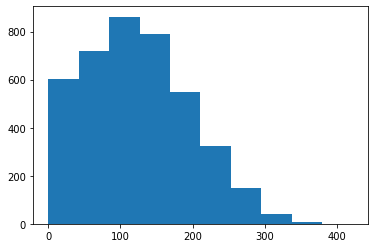

In [8]:
plt.hist(df.duration)

In [11]:
obs_diff = df [df.group == 'experiment'].duration.mean() - df [df.group == 'control'].duration.mean()
obs_diff

15.537053609623797

(array([  11.,   63.,  467., 1439., 2687., 2890., 1753.,  559.,  107.,
          24.]),
 array([ 6.57714002,  8.33341087, 10.08968171, 11.84595256, 13.60222341,
        15.35849425, 17.1147651 , 18.87103594, 20.62730679, 22.38357764,
        24.13984848]),
 <BarContainer object of 10 artists>)

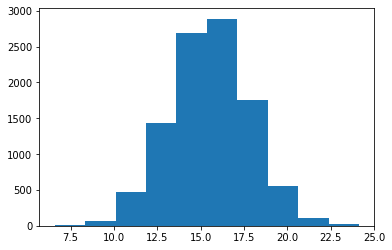

In [12]:
diff = []
for _ in range (10000):
    sample = df.sample(df.shape[0], replace = True)
    diff.append(sample [sample.group == 'experiment'].duration.mean() - sample [sample.group == 'control'].duration.mean()) 
plt.hist (diff)

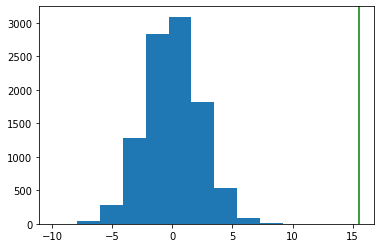

In [15]:
diff = np.array(diff)
null = np.random.normal(0, diff.std(), diff.size)
plt.hist (null)
plt.axvline (x= obs_diff ,  c = 'green')

In [16]:
(null> obs_diff).mean () *100 

0.0